# Ước tính cỡ mẫu dựa vào tỉ số RR

**BS. Lê Ngọc Khả Nhi**

Trong bài trước, Nhi đã thực hiện ước tính cỡ mẫu cho bài toán so sánh 2 tỉ lệ. Đây là một bài toán rất phổ biến trong nghiên cứu đánh giá hiệu quả can thiệp điều trị hiếm muộn và IVF, khi kết cục có tính nhị phân (thai diễn tiến, sinh nở thành công…). Thiết kế thường gặp nhất là so sánh tỷ lệ thành công giữa nhóm đối chứng áp dụng phác đồ thường quy, và nhóm can thiệp áp dụng một phác đồ mới.

Thông thường, ta cần biết thông tin về effect-size từ những kết quả từng được báo cáo trong y văn, thí dụ tỉ lệ p1 và p2 trong 2 phân nhóm can thiệp và đối chứng. Tuy nhiên, điều này không phải lúc nào cũng dễ dàng, thậm chí bất khả thi nếu bạn không thể tìm thấy nghiên cứu nào tương đồng về thiết kế với thí nghiệm mà bạn đang muốn làm ? (khác về đối tượng can thiệp : thí dụ nhóm NOR, DOR, PCOS, POR…; phác đồ bạn muốn áp dụng quá mới và chưa có ai dùng ?)

Bài hôm nay, Nhi sẽ chia sẻ với các bạn một giải pháp cho vấn đề này. Thực ra, ta không bắt buộc phải ước tính trực tiếp khác biệt $\delta$ giữa 2 tỉ lệ $p_1$ (nhóm chứng) và $p_2$, và phải có đủ cả 2. Ta chỉ cần có thông tin về một trong 2 tỷ lệ, thí dụ 1 tỉ lệ $p_0$ có ý nghĩa tham chiếu ở nhóm chứng, sau đó áp dụng khái niệm tỉ số RR (relative risk, risk ratio) để trình bày mức độ khác biệt giữa 2 nhóm.

Theo cách này, mức độ khác biệt về tỉ lệ thành công  δ giữa 2 phân nhóm được ước tính bởi công thức :

$$δ=(p_2- p_0 )=(RR-1) p_0$$

Giả thuyết vô hiệu là không có sự khác biệt ý nghĩa về tỉ lệ thành công giữa 2 phân nhóm :

$$H_0:p_1=p_2=p_0$$

Và giả thuyết đối nghịch là phân nhóm can thiệp có tỉ lệ thành công cao hơn so với phân nhóm đối chứng:

$$H_1:p_1=p_0 ; p_2=p_0+δ$$

Cỡ mẫu $n_1$ của nhóm đối chứng và $n_2$ của nhóm can thiệp  sẽ được ước tính bởi công thức của Wang Hong Yue và cs (2018) như sau :

$$n_{1} = \left [\frac{\sqrt{p_{0}(1-p_{0})(1 +\frac{1}{\kappa})}Z_{1-\alpha/2} + \sqrt{p_{0}(1-p_{0}) + \frac{RR.p_{0}(1-p_{0})}{\kappa}} Z_{1-\beta}}{(RR-1)p_{0}}\right]^{2}$$

$$n_{2}=\kappa n_{1}$$

Với:

$p_0$ là tỉ lệ thai kì diễn tiến ở phân nhóm đối chứng (có ý nghĩa cơ bản/tham chiếu), giá trị p_0 dao động trong khoảng (0,1)

$κ$ là tỉ lệ cỡ mẫu giữa 2 phân nhóm, giá trị mặc định $κ$=1 ;

$RR$ là giá trị của tỉ số nguy cơ tương đối (Relative risk) giữa 2 phân nhóm

$\alpha$ là ngưỡng ý nghĩa thống kê, hay xác suất phạm sai lầm loại 1 (phủ nhận sai một giả thuyết vô hiệu khi mà nó đúng). Theo quy ước, ta chấp nhận 𝛼  = 0.05

$\beta$ là xác suất phạm sai lầm loại II (âm tính giả).

$Power = 1 - \beta$ ; Lực thống kê, là xác suất phủ nhận chính xác giả thuyết vô hiệu nếu quả thực giả thuyết này sai. Nói cách khác là khả năng phát hiện ra một hiệu ứng khác biệt nếu nó thực sự tồn tại. Theo quy ước, ta thường chấp nhận power = 0.8 (tương ứng 𝛽 = 0.2).

$Z_p$ là bách phân vị thứ p của phân phối chuẩn hóa (standard normal).


**Tài liệu tham khảo:**

Wang H., Tu XM., Liu JY. and Feng CY. Sample sizes based on three popular indices of risks. Gen Psychiatr. 2018; 31(3): e100011; doi: 10.1136/gpsych-2018-100011; PMID: 30815629

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from typing import Tuple

%config InlineBackend.figure_format = 'png'

## Hàm tính cỡ mẫu

In [3]:
def sample_size_rr(p0: float,
                   k: float,
                   r: float,
                   alpha: float = 0.05, 
                   beta: float = 0.2)-> Tuple[float]:
    
    c0 = np.sqrt((p0*(1-p0)*(1 + 1/k)))
    
    d = (r - 1)*p0
    c1 = np.sqrt((p0*(1-p0) + (r*p0*(1-(r*p0)))/k))
    n = ((norm.ppf(1-alpha/2)*c0 + norm.ppf(1-beta)*c1)/d)**2
    
    return n, n*k, n+(n*k)

## Ước tính một giá trị duy nhất

Giả định tỉ lệ thành công tham chiếu $p_0$ = 50%, và RR = 1.4, và k=1, ta tính được cỡ mẫu tổng cộng = 192, mỗi nhóm cần 96 trường hợp

In [7]:
sample_size_rr(p0 = 0.5,
               k = 1.,
               r = 1.4,
               alpha = 0.05,
               beta = 0.2)

(95.71874257467876, 95.71874257467876, 191.4374851493575)

## Mô phỏng tác động của giá trị RR và cỡ mẫu

In [16]:
## Simulation plot

def plot_sim_3D(alpha: float = 0.05, 
                beta: float = 0.2,
                k: float = 1.,
                min_r: float = 1.1,
                max_r: float = 2.,
                min_p: float = 0.35,
                max_p: float = 0.6):
    
    s_rr = np.linspace(min_r, max_r, num = 50)
    s_p0 = np.linspace(min_p, max_p, num =50)

    RR, P0 = np.meshgrid(s_rr, s_p0)

    for p0_i in s_p0:

        sim_1 = [sample_size_rr(p0 = p0_i, k=k, r = ri,
                                alpha = alpha, beta = beta)[2] for ri in s_rr]

    for ri in s_rr:

        sim_2 = [sample_size_rr(p0 = p0_i, k=k, r = ri,
                                alpha = alpha, beta = beta)[2] for p0_i in s_p0]

    N1, _ = np.meshgrid(sim_1, sim_2)
    
    plt.rc('font', size=12) 
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    surf = ax.plot_surface(RR, P0, N1, 
                           cmap=cm.rainbow,
                           linewidth=0, 
                           antialiased=False)
    
    ax.plot_wireframe(RR, P0, N1, 
                      rstride=2, 
                      cstride=2,
                      color = 'k',
                      linewidth=0.5)

    fig.colorbar(surf, 
                 shrink=0.5, 
                 aspect=10, 
                 label = 'Cỡ mẫu')

    ax.set_xlabel('RR')
    ax.set_ylabel('Tỉ lệ p0')

    plt.tight_layout()
    plt.show()

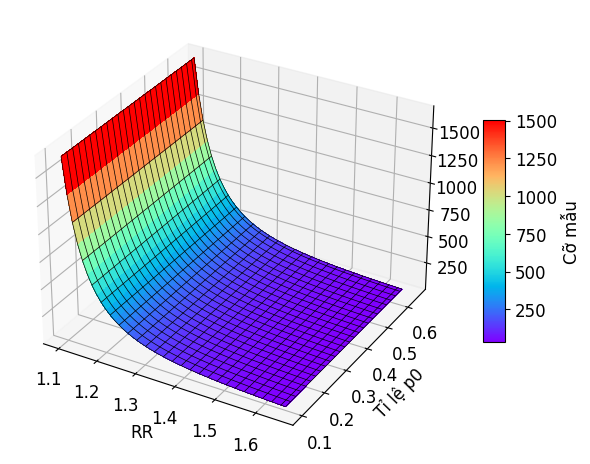

In [19]:
plot_sim_3D(alpha = 0.05, 
         beta = 0.2,
         min_r = 1.1,
         max_r = 1.65,
         min_p = 0.1,
         max_p = 0.65,
         k = 1.)

Dựa vào kết quả mô phỏng cho thấy chính giá trị RR mới có ý nghĩa quan trọng trong bài toán chứ không phải $p_0$, cụ thể thì khi RR > 1.2, tỉ lệ thành công cơ bản là bao nhiêu cũng không quan trọng. Giá trị RR càng thấp thì bài toán càng khó khăn, cần cỡ mẫu lớn, RR càng cao hơn 1.2 thì cỡ mẫu càng giảm và tiến về giá trị tối thiểu.

Qua thí nghiệm này, các bạn nhận ra bản chất của quy trình tính cỡ mẫu là một sự mô phỏng. Ngay cả khi chúng ta biết thông tin từ y văn và sử dụng, thì đó vẫn luôn là một giá trị kỳ vọng.  Hy vọng giải pháp này có thể giúp các bạn khi viết đề cương nghiên cứu.